In [81]:
#Bibliotecas Mais Padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split 


# Machine Learning: Algorítimos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


#Métricas_Classificação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#Processamento
from sklearn.preprocessing import MinMaxScaler # Verificar com Calma
from sklearn.preprocessing import StandardScaler # Verificar com Calma

import time


In [82]:
data1 = pd.read_csv("./base_dados\PRSA_Data_Aotizhongxin_20130301-20170228.csv",sep=',')
data2 = pd.read_csv("./base_dados\PRSA_Data_Changping_20130301-20170228.csv",sep=',')
data3 = pd.read_csv("./base_dados\PRSA_Data_Tiantan_20130301-20170228.csv",sep=',')
data4 = pd.read_csv("./base_dados\PRSA_Data_Wanshouxigong_20130301-20170228.csv",sep=',')
data5 = pd.read_csv("./base_dados\PRSA_Data_Dingling_20130301-20170228.csv",sep=',')
data6 = pd.read_csv("./base_dados\PRSA_Data_Dongsi_20130301-20170228.csv",sep=',')
data7 = pd.read_csv("./base_dados\PRSA_Data_Gucheng_20130301-20170228.csv",sep=',')
data8 = pd.read_csv("./base_dados\PRSA_Data_Huairou_20130301-20170228.csv",sep=',')
data9 = pd.read_csv("./base_dados\PRSA_Data_Guanyuan_20130301-20170228.csv",sep=',')
data10 = pd.read_csv("./base_dados\PRSA_Data_Nongzhanguan_20130301-20170228.csv",sep=',')
data11 = pd.read_csv("./base_dados\PRSA_Data_Shunyi_20130301-20170228.csv",sep=',')
data12 = pd.read_csv("./base_dados\PRSA_Data_Wanliu_20130301-20170228.csv",sep=',')


# Verificando Datasets menos defasados

In [83]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
num_=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(len(k)):
  print("Data {} - Estação: {} - Dados Faltantes:".format(num_[i],k[i].station[0]),(k[i].isnull().sum().sum()))
#2, 7, 8, 10
# 10, 8, 7, 2, 3, 9, 12, 4, 1, 6, 5,11

Data 1 - Estação: Aotizhongxin - Dados Faltantes: 7271
Data 2 - Estação: Changping - Dados Faltantes: 5166
Data 3 - Estação: Tiantan - Dados Faltantes: 5277
Data 4 - Estação: Dingling - Dados Faltantes: 7015
Data 5 - Estação: Dongsi - Dados Faltantes: 7600
Data 6 - Estação: Huairou - Dados Faltantes: 7485
Data 7 - Estação: Wanshouxigong - Dados Faltantes: 5146
Data 8 - Estação: Gucheng - Dados Faltantes: 4728
Data 9 - Estação: Guanyuan - Dados Faltantes: 5279
Data 10 - Estação: Nongzhanguan - Dados Faltantes: 4090
Data 11 - Estação: Shunyi - Dados Faltantes: 8523
Data 12 - Estação: Wanliu - Dados Faltantes: 6447


## Escolhendo os Data Frames menos defasados


In [84]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
data_colunas = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']
num_=[2,7,8,10]

for i in range(len(k)):
  k[i].fillna(value=k[i].median(), inplace= True)

for i in range(len(k)):
   k[i].dropna(inplace=True)


# for i in range(len(k)):
#   print("Data {}\n".format(num_[i]),k[i].isnull().sum())


## Excluindo Outliers

In [85]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5* amplitude, q3 + 1.5*amplitude
def excluir_outliers(df, nome_coluna):
  qtd_linhas = df.shape[0]
  lim_inf, lim_sup= limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_removidas = qtd_linhas - df.shape[0]
  return df, linhas_removidas

In [86]:
data_colunas = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','RAIN']
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]

for df in k:
    for y in data_colunas:
        qtd_linhas = df.shape[0]
        lim_inf, lim_sup= limites(df[y])
        df = df.loc[(df[y] >= lim_inf) & (df[y] <= lim_sup), :]
        linhas_removidas = qtd_linhas - df.shape[0]
        # print("Linhas Removidas:",{linhas_removidas},"Qtd Linhas Atuais:",{df})

 

## Concatenando os datasets

In [126]:
# 10, 8, 7, 2, 3, 9, 12, 4, 1, 6, 5, 11
data_2 = pd.concat([data10,data8,],ignore_index=True)
data_4 = pd.concat([data2,data7,data8,data10],ignore_index=True)
data_6= pd.concat([data2,data7,data8,data10,data3,data9],ignore_index=True)
data_8 = pd.concat([data2,data7,data8,data10,data3,data9,data12,data4],ignore_index=True)
data_10 = pd.concat([data2,data7,data8,data10,data3,data9,data12,data4,data1,data6],ignore_index=True)
data_12 = pd.concat([data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12],ignore_index=True)

data = data_12

## Matriz de Correlação

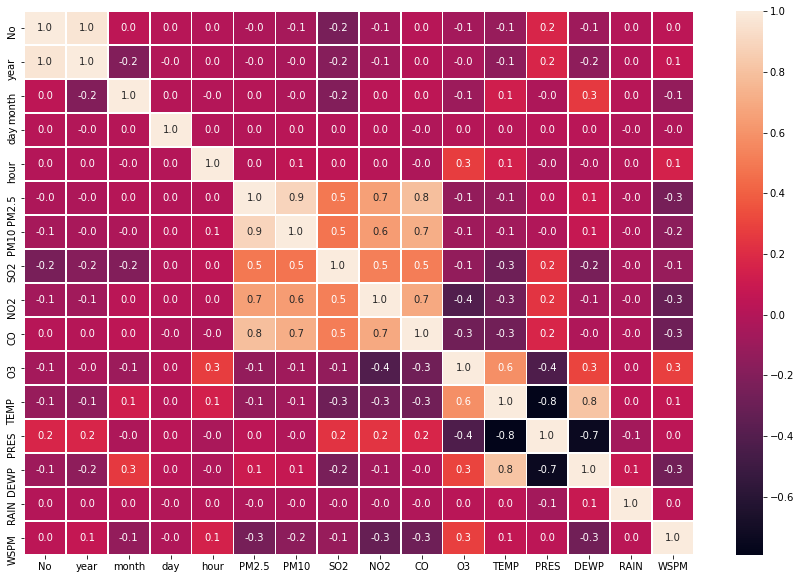

In [88]:
# análise de correlação
correlation = data.corr(method='pearson')

# plot da matriz de correlação
plt.figure(figsize=[15,10])
ax = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [89]:
# print(data_.head())
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,69748.0,17477.312081,10112.223119,1.0000,8719.000,17464.0,26230.25,35064.0
year,69748.0,2014.656248,1.175950,2013.0000,2014.000,2015.0,2016.00,2017.0
month,69748.0,6.523628,3.445073,1.0000,4.000,7.0,10.00,12.0
day,69748.0,15.716838,8.802742,1.0000,8.000,16.0,23.00,31.0
hour,69748.0,11.506782,6.917877,0.0000,6.000,12.0,17.00,23.0
PM2.5,69748.0,76.629753,78.698651,2.0000,20.000,52.0,105.00,844.0
PM10,69748.0,99.820550,89.257991,2.0000,33.000,77.0,138.00,995.0
SO2,69748.0,15.262835,21.879792,0.2856,2.000,6.0,18.00,315.0
NO2,69748.0,45.076900,33.907753,1.0265,19.000,36.0,63.00,273.0
CO,69748.0,1160.588533,1077.745199,100.0000,500.000,900.0,1400.00,10000.0


## Definindo funções
*   Limetes
  * Superior
  * Inferior
*   Excluir Outliers
*   Plotando Boxplot
*   Plotando Histograma



In [90]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x= coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.histplot(coluna, kde=True)


def grafico_barra(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x=coluna.values_counts().index, y=coluna.values_counts())
  ax.set_xlim(limites(coluna))

## Plotando Graficos

<AxesSubplot:xlabel='year', ylabel='PM2.5'>

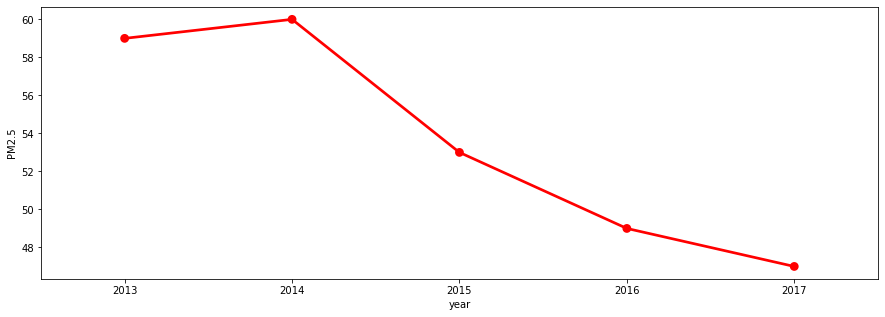

In [91]:
df = data_12[['PM2.5','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='PM2.5', data=df, color="red")

<AxesSubplot:xlabel='year', ylabel='PM10'>

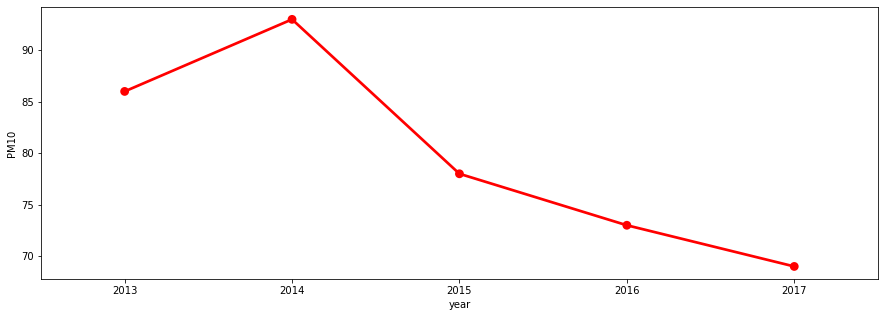

In [92]:
df = data_12[['PM10','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='PM10', data=df, color='red')

<AxesSubplot:xlabel='year', ylabel='SO2'>

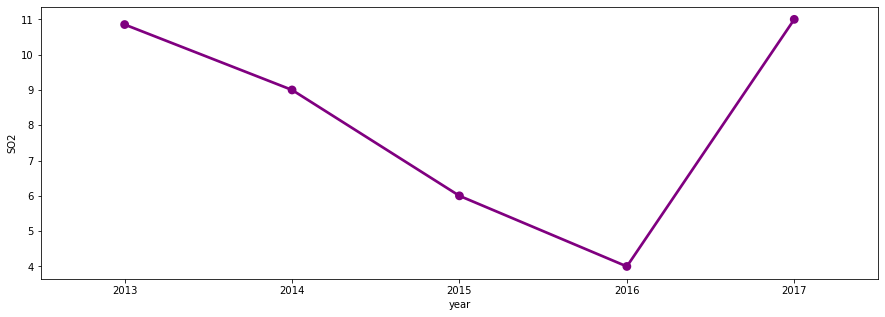

In [93]:
df = data_12[['SO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='SO2', data=df, color='purple')

<AxesSubplot:xlabel='year', ylabel='NO2'>

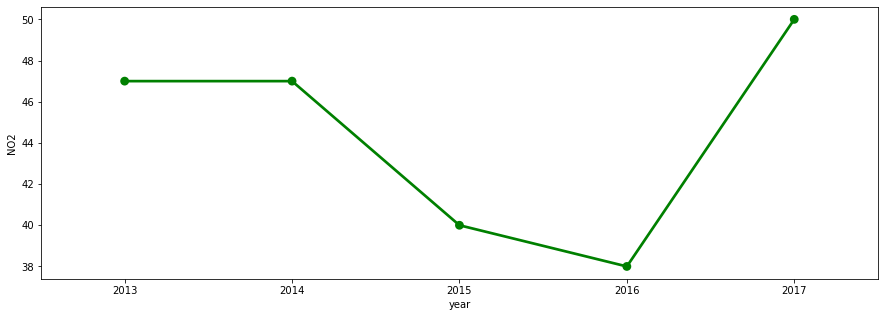

In [94]:
df = data_12[['NO2','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='NO2', data=df,color="green")

<AxesSubplot:xlabel='year', ylabel='CO'>

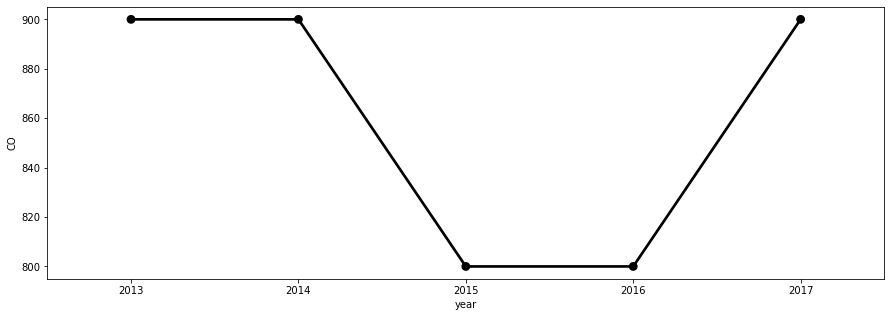

In [95]:
df = data_12[['CO','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='CO', data=df, color='black')

<AxesSubplot:xlabel='year', ylabel='O3'>

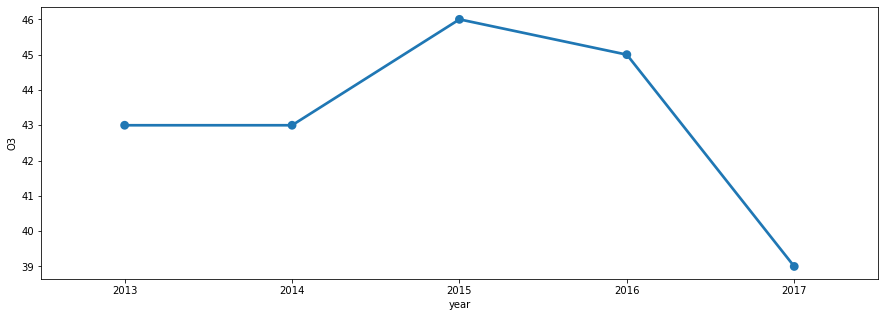

In [96]:
df = data_12[['O3','year','station']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='year', y='O3', data=df)

In [97]:
# data_colunas = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
# for j in data_colunas:
#   plt.title(data3.iloc[0,-1])
#   diagrama_caixa(data3[j])
#   histograma(data3[j])

In [98]:
# for j in data_colunas:
#   plt.title(data5.iloc[0,-1])
#   diagrama_caixa(data5[j])
#   histograma(data5[j])

In [99]:
# for j in data_colunas:
#   plt.title(data8.iloc[0,-1])
#   diagrama_caixa(data8[j])
#   histograma(data8[j])

In [100]:
# for j in data_colunas:
#   plt.title(data6.iloc[0,-1])
#   diagrama_caixa(data6[j])
#   histograma(data6[j])

## Modelo de Previsão
*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM
*   RNA
*   KNN

In [128]:
modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_dt = DecisionTreeClassifier()
modelo_svm = SVC()
modelo_knn = KNeighborsClassifier()
modelo_rna = Perceptron()
modelo_MLPC_rna = MLPClassifier()

modelos = { 
            'Random Forest' : modelo_rf,
            'Logistic Regression': modelo_lr,
            'Decision Tree': modelo_dt,
            'SVM': modelo_svm,
            'RNA' : modelo_rna,
            'Multi_RNA':modelo_MLPC_rna,
            'KNN': modelo_knn,
            
           }

y = data['station']
X = data.drop(columns=['No', 'station', 'wd','year', 'month', 'day', 'hour', 'WSPM','DEWP', 'RAIN'], axis=1)


# 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'RAIN','DEWP' , 'wd', 'WSPM', 'station'


In [102]:
X

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES
0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5
1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1
2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3
3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2
4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1
...,...,...,...,...,...,...,...,...
69743,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6
69744,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9
69745,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3
69746,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5


## Metricas de Avaliação


In [103]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
  accuracy = accuracy_score(y_teste, previsao)
  f1 = f1_score(y_teste, previsao,average='micro')
  precisao = precision_score(y_test, previsao,average='macro')
  recall= recall_score(y_test, previsao,average='macro')

  return f'modelo:{nome_modelo} \n Accuracy:{accuracy}% \n F1:{f1}% \n  Precision:{precisao}% \nRecall:{recall}% \n '

## Divisão Base em Treino

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95, test_size=0.3)

X_train_standardScaler = MinMaxScaler().fit_transform(X_train)

for nome_modelo, modelo in modelos.items():
  #treino
  começo=time.time()
  # modelo.fit(X_train_standardScaler, y_train)
  modelo_svm.fit(X_train_standardScaler, y_train)
  fim = time.time()

  tempo= fim - começo

  print("Tempo do Treino do ",nome_modelo,"=",round(tempo,2))

Tempo do Treino do  Random Forest = 15512.0
Tempo do Treino do  Logistic Regression = 6454.03
Tempo do Treino do  Decision Tree = 6229.35
Tempo do Treino do  SVM = 6224.29
Tempo do Treino do  RNA = 6214.35
Tempo do Treino do  Multi_RNA = 6400.78
Tempo do Treino do  KNN = 6182.49


## Teste e Verificação de Resultados

In [105]:
for nome_modelo, modelo in modelos.items():
  #testar
  X_test_standardScaler = MinMaxScaler().fit_transform(X_test)
  previsao = modelo.predict(X_test_standardScaler)

  # print(avaliar_modelo(nome_modelo, y_test, previsao))
  começo = time.time()
  print(nome_modelo, classification_report(y_test, previsao))
  fim = time.time()

  tempo= fim - começo

  print("Tempo do Treino do ",nome_modelo,"=",round(tempo,2))

Random Forest               precision    recall  f1-score   support

     Huairou       0.89      0.85      0.87     10500
Nongzhanguan       0.86      0.90      0.88     10425

    accuracy                           0.87     20925
   macro avg       0.87      0.87      0.87     20925
weighted avg       0.87      0.87      0.87     20925

Tempo do Treino do  Random Forest = 0.44
Logistic Regression               precision    recall  f1-score   support

     Huairou       0.81      0.78      0.79     10500
Nongzhanguan       0.79      0.82      0.80     10425

    accuracy                           0.80     20925
   macro avg       0.80      0.80      0.80     20925
weighted avg       0.80      0.80      0.80     20925

Tempo do Treino do  Logistic Regression = 0.45
Decision Tree               precision    recall  f1-score   support

     Huairou       0.81      0.78      0.80     10500
Nongzhanguan       0.79      0.82      0.80     10425

    accuracy                           0.80   

Text(0.8, 0.001, 'Elaboração dos autor')

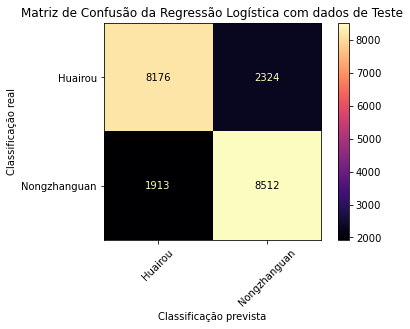

<Figure size 1080x720 with 0 Axes>

In [106]:
# Matriz de confusão
plot_confusion_matrix(modelo_lr, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da Regressão Logística com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figure(figsize=[15,10])
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

<Figure size 11520x11520 with 0 Axes>

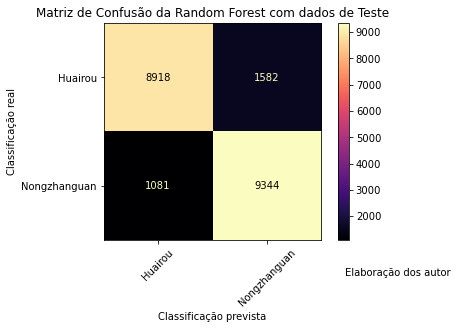

<Figure size 11520x11520 with 0 Axes>

In [107]:
# Matriz de confusão
plot_confusion_matrix(modelo_rf, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma" ,xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da Random Forest com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)
plt.figure(figsize=[160,160])

Text(0.8, 0.001, 'Elaboração dos autor')

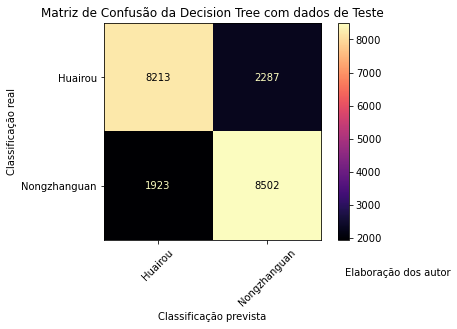

In [108]:
# Matriz de confusão
plot_confusion_matrix(modelo_dt, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",
                      xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da Decision Tree com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

Text(0.8, 0.001, 'Elaboração dos autor')

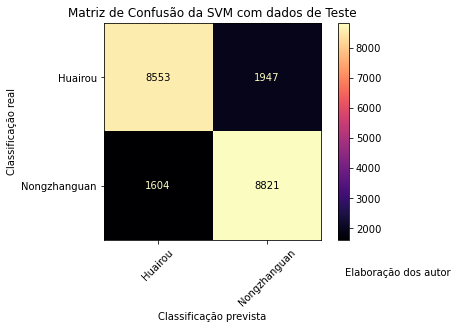

In [109]:
# Matriz de confusão
plot_confusion_matrix(modelo_svm, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da SVM com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

Text(0.8, 0.001, 'Elaboração dos autor')

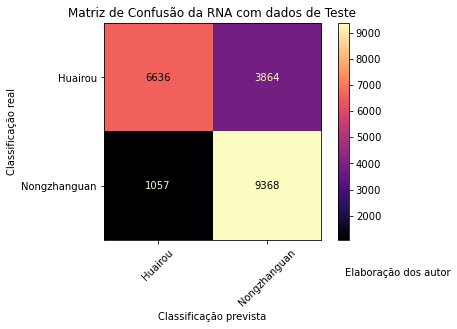

In [110]:
# Matriz de confusão
plot_confusion_matrix(modelo_rna, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da RNA com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

Text(0.8, 0.001, 'Elaboração dos autor')

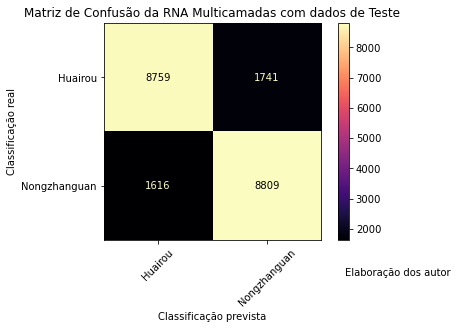

In [111]:
# Matriz de confusão
plot_confusion_matrix(modelo_MLPC_rna, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da RNA Multicamadas com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

Text(0.8, 0.001, 'Elaboração dos autor')

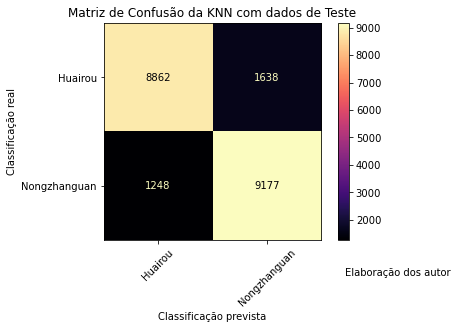

In [112]:
# Matriz de confusão
plot_confusion_matrix(modelo_knn, 
                      X_test_standardScaler, 
                      y_test, 
                      cmap = "magma",xticks_rotation=45)

plt.grid(False)
plt.title("Matriz de Confusão da KNN com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autor", fontsize = 10)

## Aplicação de GridSeachCV

### Arvore de Decisão

In [113]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'splitter': ['best','random'],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [114]:
#'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'
# grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

### Random Forest

In [115]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'n_estimators': [10,40,100,150],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [116]:
# {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}
# grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

### KNN


In [117]:
parametros = {
    'n_neighbors': [3,5,10,20],
    'p': [1,2]
}

In [118]:
#{n_neighbors= 20, p=1}
# grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

### Regressão Logistica

In [119]:
parametros = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,1.5,2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [120]:
# {'C': 1.5, 'solver': 'newton-cg', 'tol': 0.0001}
# grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

### SVM

In [121]:
parametros = {
    'C': [1.0,2.0],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
  }

In [122]:
# from sklearn.svm import SVC
# grid_search = GridSearchCV(estimator = SVC(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

### RNA

In [123]:
parametros = {
    'max_iter': [100,200,500],
    'solver':['adam','lbfgs','sgd'],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'tol':[0.0001,0.00001]
  }

In [124]:
# {'activation': 'logistic', 'max_iter': 200, 'solver': 'adam', 'tol': 1e-05}
# grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

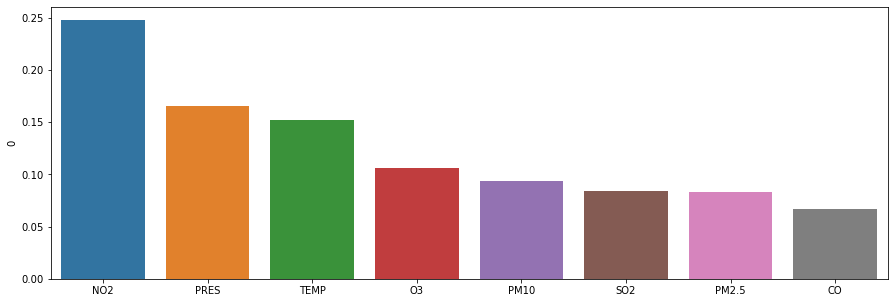

In [125]:
importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)

importancia_features

plt.figure(figsize=(15,5))
ax= sns.barplot(x=importancia_features.index, y=importancia_features[0])